## The Sparks Foundation Internship

## Task 1 - Linear Regression Model to Predict Student Scores

## Name: Vinayak Vaidyanathan

    

## 1. Importing Required Libraries and Loading Data

In [106]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)



## 2. Exploring the data

In [94]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [95]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [102]:
#Finding out more about our data 
data.shape

(25, 2)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [101]:
#Check for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values present

In [96]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours studied vs Percentage Scored')

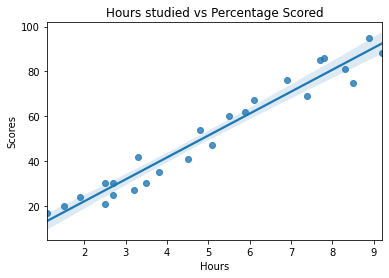

In [108]:
#Comparing number of hours studied by students to their scores 
sns.regplot(x=data["Hours"],y=data["Scores"]).set_title("Hours studied vs Percentage Scored")

We can see that the number of hourse studied and the marks scored are positively correlated.

## 3. Building the Model

In [87]:
#Assining predictor variable and target variable
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

# Splitting the data into training data and validation data
train_X,val_X,train_y,val_y= train_test_split(X,y,test_size=0.3,random_state=0)

train_X = train_X.reshape(-1,1)
val_X = val_X.reshape(-1,1)
train_y = train_y.reshape(-1,1)
val_y = val_y.reshape(-1,1)

#Define Model
regressor = LinearRegression()  
#Fit Model
regressor.fit(train_X, train_y) 

print("Training complete.")
print(y)

Training complete.
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## 4. Model Validation 

In [86]:
#Make validation predictions
y_pred= regressor.predict(val_X)
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [44]:
#Comparing actual scores of students to the predicted scores 
YV1= list(val_y)
YP1= list(y_pred)
df = pd.DataFrame.from_records({'Actual': YV1, 'Predicted': YP1})  
df

,Actual,Predicted
0,[20],[17.05366541246545]
1,[27],[33.69422877993883]
2,[69],[74.80620886428483]
3,[30],[26.8422320992145]
4,[62],[60.12335883416126]
5,[35],[39.56736879198826]
6,[24],[20.96909208716507]
7,[86],[78.72163553898443]


[Text(0.5, 0, 'Hours'), Text(0, 0.5, 'Scores')]

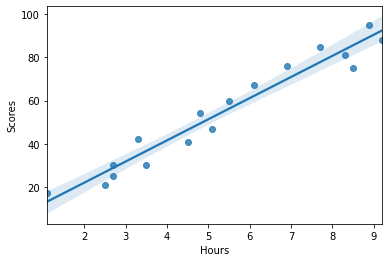

In [69]:
p=sns.regplot(x=train_X,y=train_y)
p.set(xlabel="Hours", ylabel="Scores")


In [111]:
#Calculate mean absolute error
mae = mean_absolute_error(val_y , y_pred)
print( "The mean absolute error is %s" % mae)
#Calculate R^2 Value
r2_score = regressor.score(train_X,train_y)
print("R^2 Score: %s " % r2_score)


The mean absolute error is 4.419727808027652
R^2 Score: 0.9484997422695115 


The R^2 score tells us that approximately 95% of the scores can be explained by the number of hours one studies

## 5. How much might a student score if they study for 9.25 hours?

In [79]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.91505723]


According to our model a student will score around 92.91% if he/she studies for 9.25 hours 